In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

df1 = pd.read_csv('datasets/반도체(831)_수출입통계(2011~2021).csv', encoding='utf-8')
df1.head()

,시점,수출 금액,수출 증감률,수입 금액,수입 증감률
0,2011.01,20373544,5.1,8445306,0.9
1,2011.02,16665092,-18.2,6262048,-25.9
2,2011.03,22197493,33.2,8478018,35.4
3,2011.04,19750481,-11.0,7857524,-7.3
4,2011.05,18849229,-4.6,7487074,-4.7


In [2]:
# 한글 깨짐

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [3]:
df1 = df1[['시점', '수출 금액', '수입 금액']]
df1.reset_index(drop=True, inplace=True)
df1 = df1.rename(columns={'년월':'시점', '수출 금액':'수출액', '수입 금액':'수입액'})
df1

,시점,수출액,수입액
0,2011.01,20373544,8445306
1,2011.02,16665092,6262048
2,2011.03,22197493,8478018
3,2011.04,19750481,7857524
4,2011.05,18849229,7487074
...,...,...,...
127,2021.08,15057897,4499001
128,2021.09,15752184,4364291
129,2021.10,17222409,4201917
130,2021.11,16940429,4587520


In [4]:
dates = pd.date_range('2011-1-1', '2021-12-31', freq='M')
dates

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31',
               ...
               '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
               '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
               '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', length=132, freq='M')

In [5]:
len(dates)

132

In [6]:
df1['시점'] = dates
df1

,시점,수출액,수입액
0,2011-01-31,20373544,8445306
1,2011-02-28,16665092,6262048
2,2011-03-31,22197493,8478018
3,2011-04-30,19750481,7857524
4,2011-05-31,18849229,7487074
...,...,...,...
127,2021-08-31,15057897,4499001
128,2021-09-30,15752184,4364291
129,2021-10-31,17222409,4201917
130,2021-11-30,16940429,4587520


In [7]:
df1.describe()

,수출액,수입액
count,1.320000e+02,1.320000e+02
mean,1.644245e+07,4.843965e+06
std,2.242078e+06,1.317828e+06
min,1.020776e+07,2.707382e+06
25%,1.496515e+07,3.795420e+06
50%,1.635859e+07,4.484471e+06
75%,1.787363e+07,5.715751e+06
max,2.224795e+07,8.478018e+06


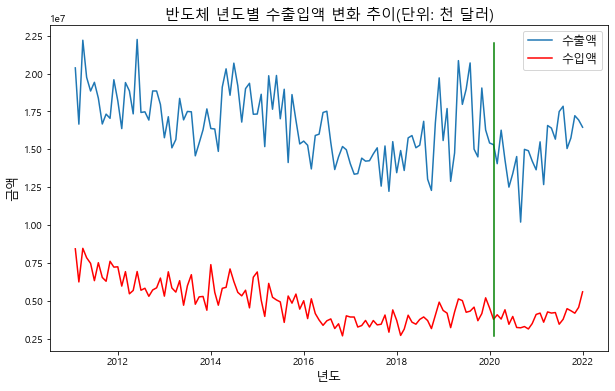

In [41]:
# 1. 수출입 시각화
plt.figure(figsize=(10,6))
sns.lineplot(data=df1, x='시점', y='수출액', label='수출액')
sns.lineplot(data=df1, x='시점', y='수입액', color='r', label='수입액')
plt.legend(fontsize=12)
plt.xlabel('년도', fontsize=13)
plt.ylabel('금액', fontsize=13)
plt.title('반도체 년도별 수출입액 변화 추이(단위: 천 달러)', fontsize=15)

# 2020년 표시하는 선그래프
import datetime
x = [datetime.date(2020, 1, 31), datetime.date(2020, 1, 31)]
y = [2.7e6,2.2e7]
plt.plot(x,y, color='green')

# png로 저장
plt.savefig('반도체 년도별 수출입액 변화 추이.png')

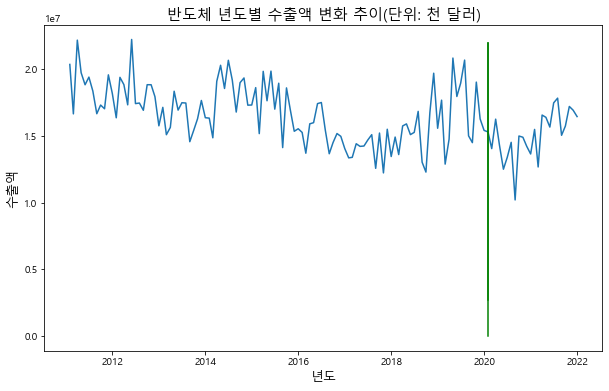

In [42]:
# 2-1. 반도체 수출액
plt.figure(figsize=(10,6))
sns.lineplot(data=df1, x='시점', y='수출액')
plt.plot(x,y, color='green')
plt.xlabel('년도', fontsize=13)
plt.ylabel('수출액', fontsize=13)
plt.title('반도체 년도별 수출액 변화 추이(단위: 천 달러)', fontsize=15)

# 2020년 표시하는 선그래프
import datetime
x = [datetime.date(2020, 1, 31), datetime.date(2020, 1, 31)]
y = [0,2.2e7]
plt.plot(x,y, color='green')

# # png로 저장
plt.savefig('반도체 년도별 수출액 변화 추이.png')

* 2014년 급상승 원인 : 첨단 미세공정으로 전환하면서 자연스럽게 공급량이 감소해 시장 수요가 공급을 초과하기 때문.


*  2014~2016년 하락 원인 : 메모리반도체는 실적이 좋지만 정작 고부가가치 분야인 시스템 반도체는 실적이 크게 악화됨, 대형정보기술(IT) 기업의 데이터 센터 투자 조정 및 메모리 반도체 공급 부족 해소 등의 영향이 있음.


*  2018년 상반기 : 삼성전자와 SK하이닉스는 글로벌 수요 부족에 대응하기 위하여 국내 생산시설을 확충하여 생산을 늘리고 있으며, 반도체는 국내 생산의 대부분이 수출로 연결되기 때문에 생산 확대가 수출증대로 이어지고 있음. 


*  2020 상반기 하락원인 : 코로나


*  2020 하반기 회복 : 거리두기 강화로 인한 야외활동 감소로 모바일향 수요가 줄어들었으나, 비대면 가속에 따른 서버와 노트북 분야 수요증가가 이를 상쇄한 것으로 나타났음. 모바일향 수요도 5G 상용화 본격화, 중국 스마트폰 시장 경쟁 심화 등에 따라 하반기부터 회복세를 보임

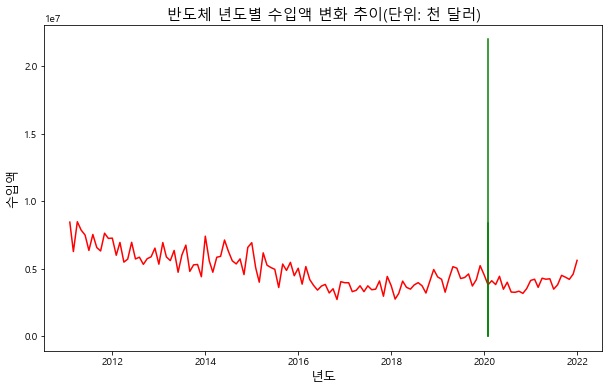

In [43]:
# 2-2. 반도체 수입액
plt.figure(figsize=(10,6))
sns.lineplot(data=df1, x='시점', y='수입액', color='r')
plt.plot(x,y, color='green')
plt.xlabel('년도', fontsize=13)
plt.ylabel('수입액', fontsize=13)
plt.title('반도체 년도별 수입액 변화 추이(단위: 천 달러)', fontsize=15)

# 2020년 표시하는 선그래프
import datetime
x = [datetime.date(2020, 1, 31), datetime.date(2020, 1, 31)]
y = [0,8.4e6]
plt.plot(x,y, color='green')

# # png로 저장
plt.savefig('반도체 년도별 수입액 변화 추이.png')

* 2011년 이후 하락세 원인 : 국내 반도체 시장이 하락세를 면치 못할 것이라는 분석이 나오는 이유가 여기에 있다. 기업들이 반도체 경기를 긍정적으로 전망하면 자연스레 반도체 제조 설비를 늘리기 위해 제조용 장비 수입을 확보하려 하기 때문이다. 무엇보다 미·중 무역전쟁으로 인해 중국의 대미 수출이 줄면서 중국의 한국 반도체 수입도 함께 줄어들 것이란 전망이 나오기 때문이기도 하다. 실제로 중국은 2025년까지 1조 위안(한화 176조원)을 투자해 반도체 자급률을 현 10% 정도에서 70% 수준까지 끌어올리겠다고 밝힌 바 있다. 이에 한국 반도체 산업이 중·장기 차원의 위기에 빠졌다는 이야기가 나오고 있다.


* 2016년 하반기? 2017년 부터 점차 상승하는 원인 : 세계적으로 반도체 수요가 증가함에 따라 우리나라의 반도체 수입도 최근 5년간(2016~2020년) 계속해서 늘어났으며 반도체 수출 또한 2019년만 제외하고 매년 증가세를 보였음.

**ARIMA (Auto Regressive Integrated Moving Average Model)**

In [17]:
# AD-Fuller Test : 시계열의 정상성 한지 확인
import statsmodels.tsa.api as tsa

income = df1[['시점', '수출액']]
income_series = income['수출액']
income_df = income.set_index('시점')
income_df

,수출액
시점,
2011-01-31,20373544
2011-02-28,16665092
2011-03-31,22197493
2011-04-30,19750481
2011-05-31,18849229
...,...
2021-08-31,15057897
2021-09-30,15752184
2021-10-31,17222409


In [10]:
exports = df1[['시점', '수입액']]
exports_series = exports['수입액']
exports_df = exports.set_index('시점')
exports_df

,수입액
시점,
2011-01-31,8445306
2011-02-28,6262048
2011-03-31,8478018
2011-04-30,7857524
2011-05-31,7487074
...,...
2021-08-31,4499001
2021-09-30,4364291
2021-10-31,4201917


## ADF를 이용한 정상성 확인
* ARIMA 모델을 적용하기 전, 우선 시계열 데이터를 정상성 데이터를 바꾼 후 사용하는 것이 바람직함
* 정상성을 띄기 위해선 시계열 데이터의 평균, 분산이 시간에 따라 일정해야함
* lag에 따른 공분산이 일정해야함
* => 이를 위해 로그 변환을 해주거나 n차분을 적용함
* python에서는 ADF test를 statsmodels 라이브러리에서 adfuller를 이용하면 쉽게 구현 가능



* autolag='AIC' 또는 'BIC' : 'AIC' 또는 'BIC'가 가장 낮게 나오는 p를 자동으로 설정함. autolag를 지정할 경우 maxlag에서 지정한 값이 무시됨(maxlag의 디폴트값은 $12*(nobs/100)^1/4)$


## 시계열분석 (수출)

In [11]:
from statsmodels.tsa.stattools import adfuller

""" 차분 방법 """
exports_df_diff = exports_df - exports_df.shift(1)
print(exports_df_diff)

y = exports_df.dropna()
y1diff = exports_df_diff.dropna()
result = adfuller(y)
print(f'원 데이터 ADF Statistic: {result[0]:.3f}')
print(f'원 데이터 p-value: {result[1]:.3f}')
result = adfuller(y1diff)
print(f'1차 차분 ADF Statistic: {result[0]:.3f}')
print(f'1차 차분 p-value: {result[1]:.3f}')

                  수입액
시점                   
2011-01-31        NaN
2011-02-28 -2183258.0
2011-03-31  2215970.0
2011-04-30  -620494.0
2011-05-31  -370450.0
...               ...
2021-08-31   699784.0
2021-09-30  -134710.0
2021-10-31  -162374.0
2021-11-30   385603.0
2021-12-31  1022516.0

[132 rows x 1 columns]
원 데이터 ADF Statistic: -2.353
원 데이터 p-value: 0.155
1차 차분 ADF Statistic: -3.849
1차 차분 p-value: 0.002


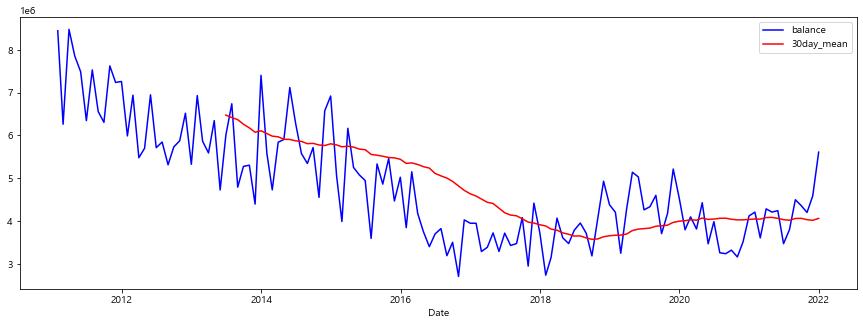

In [12]:
exports_df_mean = exports_df.rolling(window=30).mean()
exports_df_std = exports_df.rolling(window=30).std()

# rolling : 이동평균계산
# rolling(window=30).mean()의 경우, 30개를 평균내라
# 데이터가 12번째 이후인 값들부터 평균냄(12번째에 1~12번째까지의 평균을 구함)
# [참고] https://ordo.tistory.com/67

plt.figure(figsize = (15,5))
plt.xlabel('Date')
orig = plt.plot(exports_df, color='blue', label='balance')
mean = plt.plot(exports_df_mean, color='red', label='30day_mean')
plt.legend(loc='best')
plt.show()

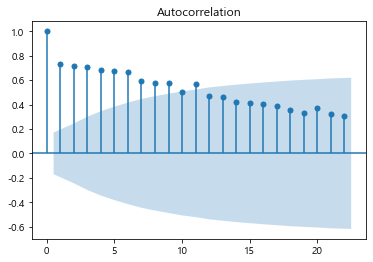

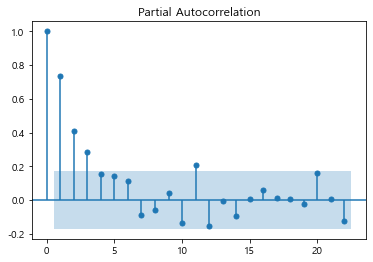

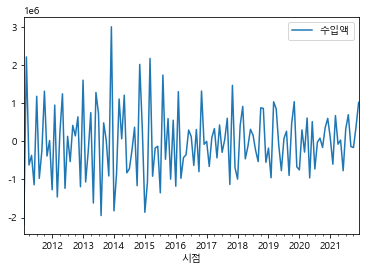

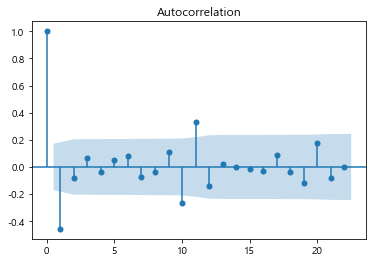

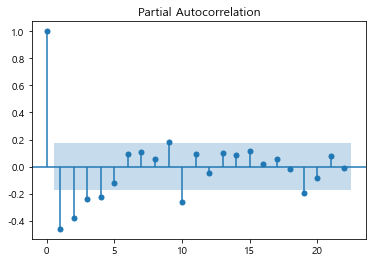

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(y)
plot_pacf(y)
plt.show()

diff_1=y.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

C:\Users\0528x\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\0528x\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M wil

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  131
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1952.477
Method:                       css-mle   S.D. of innovations         716635.044
Date:                Wed, 30 Mar 2022   AIC                           3910.955
Time:                        00:52:19   BIC                           3919.580
Sample:                    02-28-2011   HQIC                          3914.460
                         - 12-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y     -0.0976      0.106     -0.918      0.359      -0.306       0.111
ma.L1.D.y     -0.7032      0.065    -10.802      0.000      -0.831      -0.576
                                    Roots           

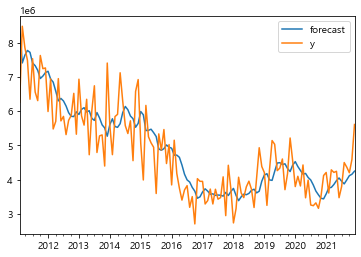

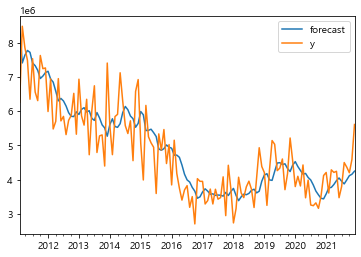

In [14]:
from statsmodels.tsa.arima_model import ARIMA

exports_df =exports_df.sort_index(ascending=True)
exports_df = exports_df.dropna()
model = ARIMA(exports_df.values, order = (1,1,1), dates=(exports_df.index))
model_fit = model.fit(trend='nc',full_output=True, disp=True)
print(model_fit.summary())
model_fit.plot_predict()

(array([4551905.20945993, 4655198.15968769, 4645114.87540739,
       4646099.18868001, 4646003.10167188, 4646012.4815242 ,
       4646011.56587877, 4646011.65526254, 4646011.64653705,
       4646011.64738882, 4646011.64730567, 4646011.64731378,
       4646011.64731299, 4646011.64731307, 4646011.64731306,
       4646011.64731306, 4646011.64731306, 4646011.64731306,
       4646011.64731306, 4646011.64731306, 4646011.64731306,
       4646011.64731306, 4646011.64731306, 4646011.64731306,
       4646011.64731306, 4646011.64731306, 4646011.64731306,
       4646011.64731306, 4646011.64731306, 4646011.64731306,
       4646011.64731306, 4646011.64731306, 4646011.64731306,
       4646011.64731306, 4646011.64731306, 4646011.64731306,
       4646011.64731306, 4646011.64731306, 4646011.64731306,
       4646011.64731306, 4646011.64731306, 4646011.64731306,
       4646011.64731306, 4646011.64731306, 4646011.64731306,
       4646011.64731306, 4646011.64731306, 4646011.64731306,
       4646011.64731306

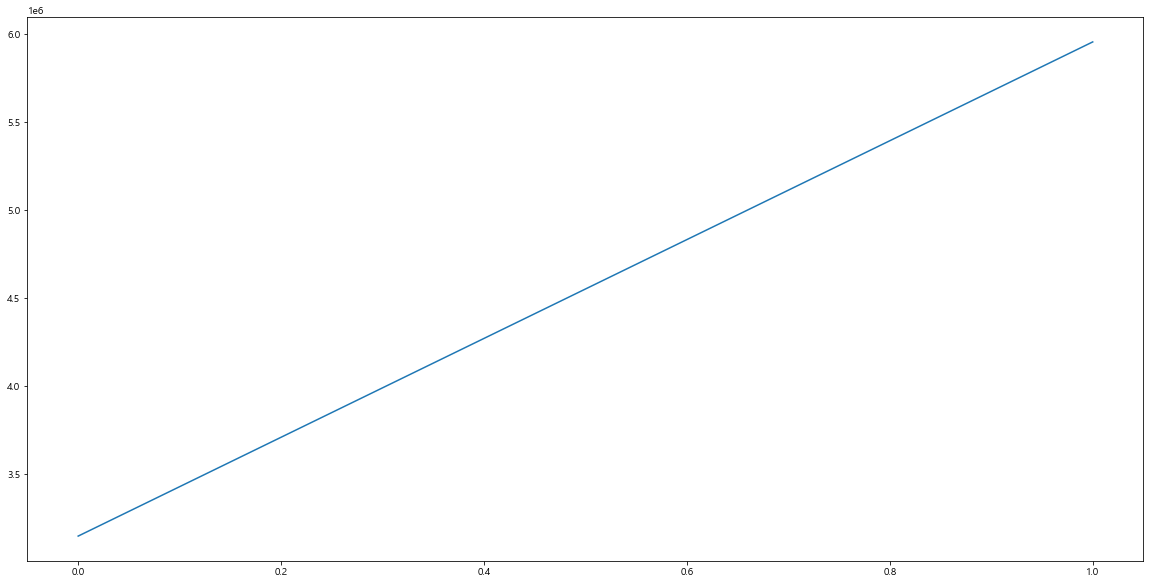

In [15]:
result = model_fit.forecast(steps=100)
plt.figure(figsize=(20,10))
print(result)
plt.plot(result[2][0])

## 시계열분석 (수입)

In [18]:
from statsmodels.tsa.stattools import adfuller

# print(income_df.shift(1))

""" 차분 방법 """
income_df_diff = income_df - income_df.shift(1)
print(income_df_diff)

y = income_df.dropna()
y1diff = income_df_diff.dropna()
result = adfuller(y)
print(f'원 데이터 ADF Statistic: {result[0]:.3f}')
print(f'원 데이터 p-value: {result[1]:.3f}')
result = adfuller(y1diff)
print(f'1차 차분 ADF Statistic: {result[0]:.3f}')
print(f'1차 차분 p-value: {result[1]:.3f}')

                  수출액
시점                   
2011-01-31        NaN
2011-02-28 -3708452.0
2011-03-31  5532401.0
2011-04-30 -2447012.0
2011-05-31  -901252.0
...               ...
2021-08-31 -2787157.0
2021-09-30   694287.0
2021-10-31  1470225.0
2021-11-30  -281980.0
2021-12-31  -478756.0

[132 rows x 1 columns]
원 데이터 ADF Statistic: -2.363
원 데이터 p-value: 0.153
1차 차분 ADF Statistic: -6.109
1차 차분 p-value: 0.000


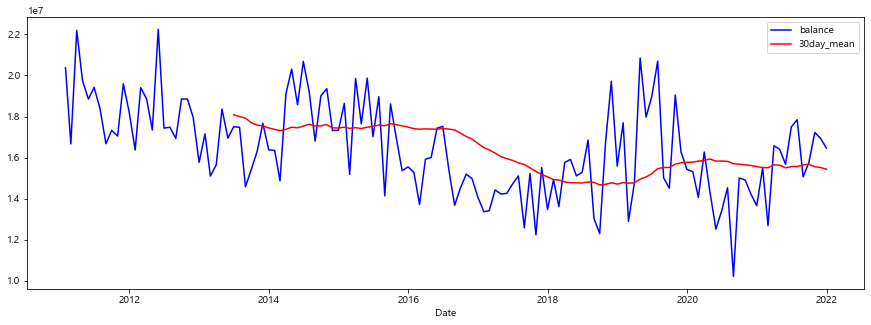

In [19]:
income_df_mean = income_df.rolling(window=30).mean()
income_df_std = income_df.rolling(window=30).std()

# rolling : 이동평균계산
# rolling(window=30).mean()의 경우, 30개를 평균내라
# 데이터가 12번째 이후인 값들부터 평균냄(12번째에 1~12번째까지의 평균을 구함)
# [참고] https://ordo.tistory.com/67

plt.figure(figsize = (15,5))
plt.xlabel('Date')
orig = plt.plot(income_df, color='blue', label='balance')
mean = plt.plot(income_df_mean, color='red', label='30day_mean')
plt.legend(loc='best')
plt.show()

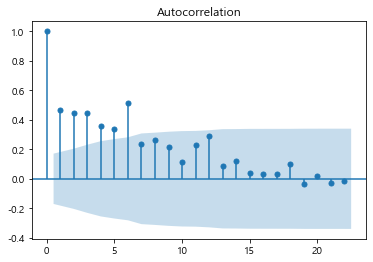

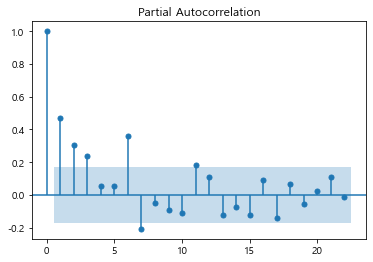

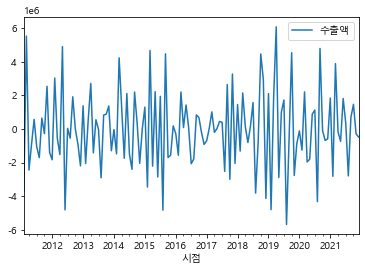

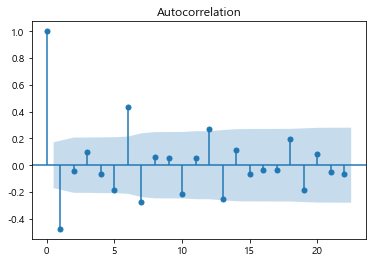

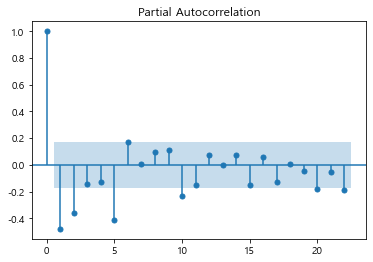

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(y)
plot_pacf(y)
plt.show()

diff_1=y.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

C:\Users\0528x\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\0528x\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M wil

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  131
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2075.185
Method:                       css-mle   S.D. of innovations        1828916.816
Date:                Wed, 30 Mar 2022   AIC                           4156.370
Time:                        00:52:39   BIC                           4164.996
Sample:                    02-28-2011   HQIC                          4159.875
                         - 12-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y     -0.0401      0.118     -0.340      0.734      -0.271       0.191
ma.L1.D.y     -0.7132      0.083     -8.617      0.000      -0.875      -0.551
                                    Roots           

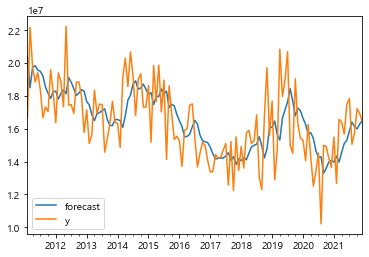

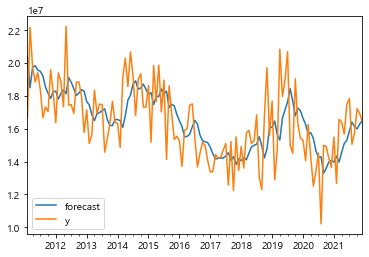

In [21]:
from statsmodels.tsa.arima_model import ARIMA

income_df =income_df.sort_index(ascending=True)
income_df = income_df.dropna()
model = ARIMA(income_df.values, order = (1,1,1), dates=(income_df.index))
model_fit = model.fit(trend='nc',full_output=True, disp=True)
print(model_fit.summary())
model_fit.plot_predict()

(array([16499067.37599997, 16497566.55536431, 16497626.79069436,
       16497624.37315365, 16497624.47018148, 16497624.46628727,
       16497624.46644357, 16497624.46643729, 16497624.46643754,
       16497624.46643754, 16497624.46643754, 16497624.46643754,
       16497624.46643754, 16497624.46643754, 16497624.46643754,
       16497624.46643754, 16497624.46643754, 16497624.46643754,
       16497624.46643754, 16497624.46643754, 16497624.46643754,
       16497624.46643754, 16497624.46643754, 16497624.46643754,
       16497624.46643754, 16497624.46643754, 16497624.46643754,
       16497624.46643754, 16497624.46643754, 16497624.46643754,
       16497624.46643754, 16497624.46643754, 16497624.46643754,
       16497624.46643754, 16497624.46643754, 16497624.46643754,
       16497624.46643754, 16497624.46643754, 16497624.46643754,
       16497624.46643754, 16497624.46643754, 16497624.46643754,
       16497624.46643754, 16497624.46643754, 16497624.46643754,
       16497624.46643754, 16497624.4664

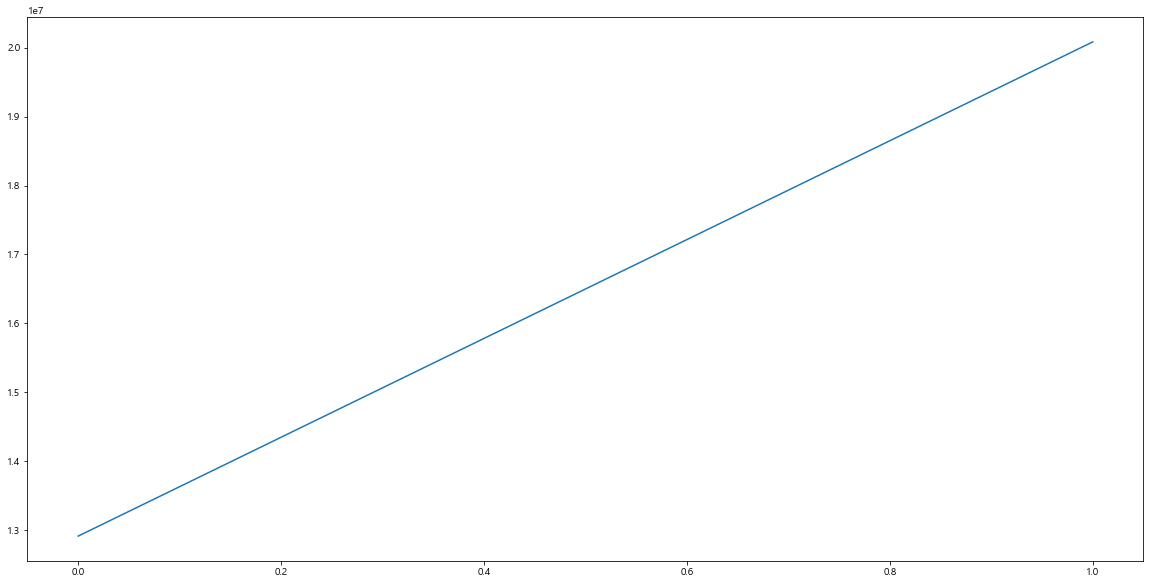

In [22]:
result = model_fit.forecast(steps=100)
plt.figure(figsize=(20,10))
print(result)
plt.plot(result[2][0])